<a href="https://colab.research.google.com/github/roberto-takada/PDIE8-notebooks/blob/main/SegmentacaoParte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R. Takada
## Segmentação - Parte 1

### Limiarização da Imagem da digital com array de valores

In [6]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np


def plota(imagem1, imagem2, texto):
    plt.figure(figsize=(10, 10))

    plt1 = plt.subplot(1, 2, 1)
    plt1.imshow(imagem1, cmap='gray')
    plt1.set_title('Original')

    plt2 = plt.subplot(1, 2, 2)
    plt2.imshow(imagem2, cmap='gray')
    plt2.set_title(texto)


In [49]:
def thresholding(img, limiar):
    img_out = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            a = img[i, j]
            if a > limiar:
                img_out[i, j] = 255
            else:
                img_out[i, j] = 0
    return img_out

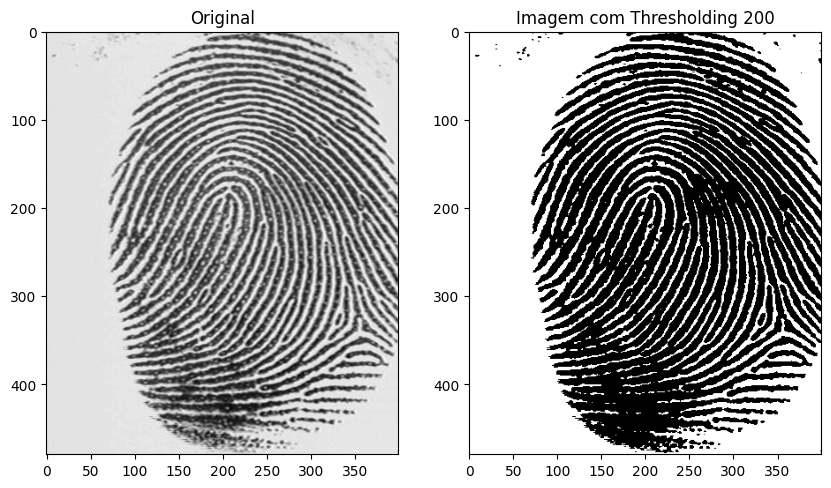

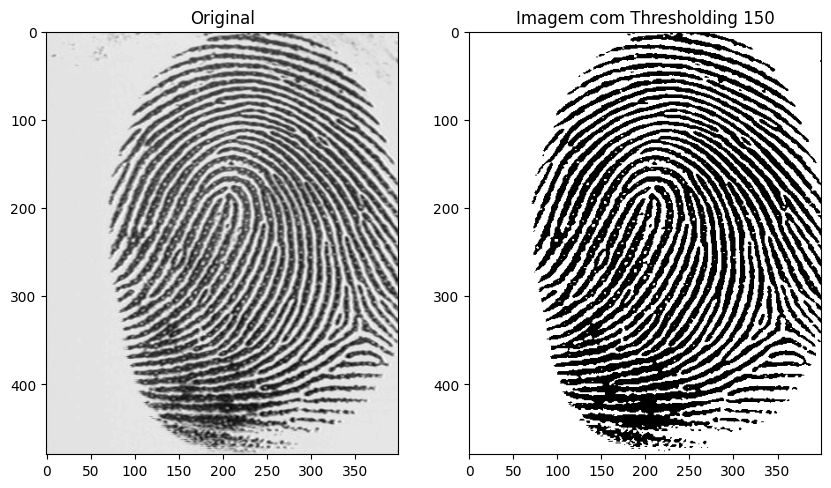

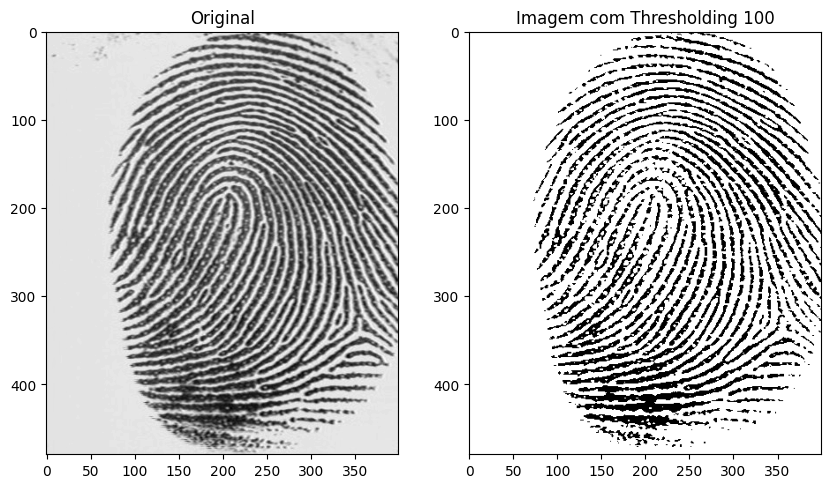

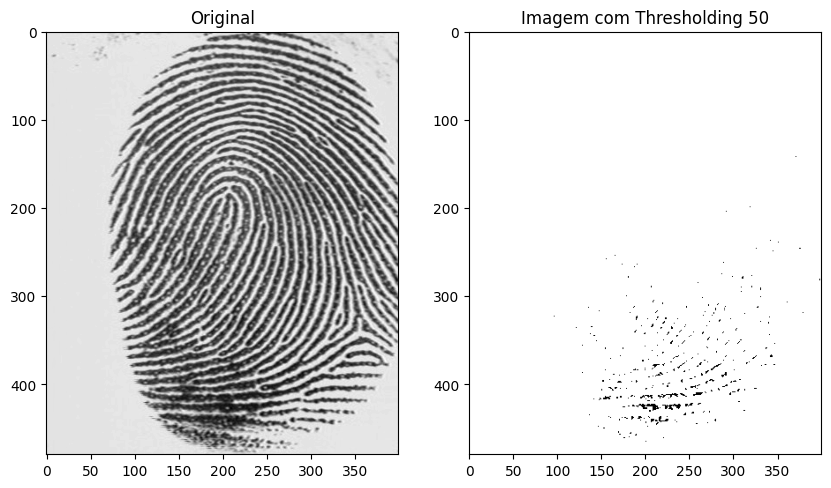

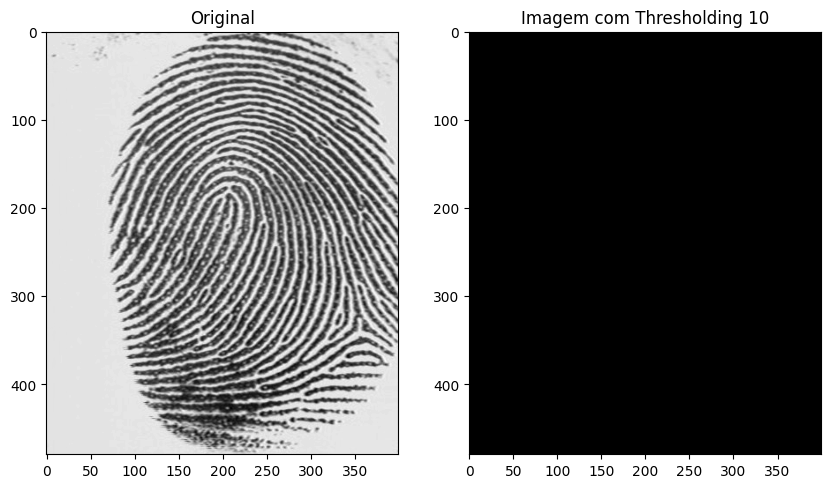

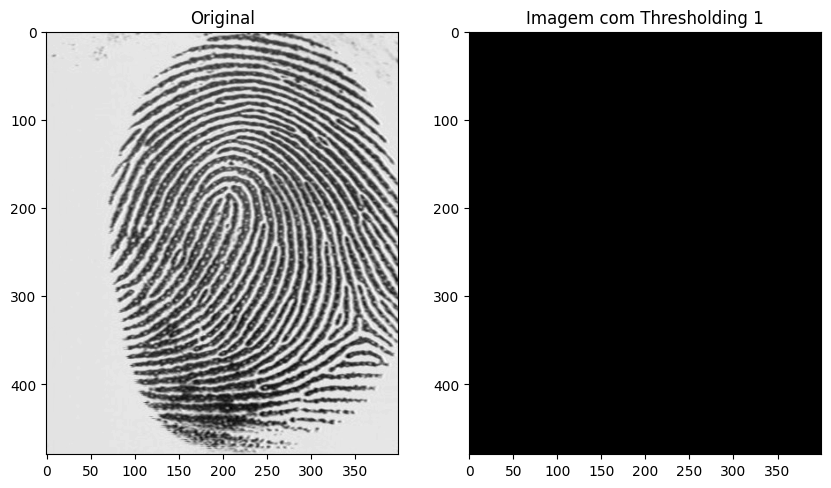

In [54]:
images_names = os.listdir('images')
images = cv2.imread('images/' + 'fingerprint.tif')
imagem_cinza = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
img = np.array(imagem_cinza)
valores = [200, 150, 100, 50, 10, 1]
for i in range(len(valores)):
  plota(img, thresholding(img, valores[i]), 'Imagem com Thresholding {}'.format(valores[i]))

### Detector de Bordas de Canny

In [8]:
def canny(img, sigma=0.33, t1=0.1, t2=0.2):
    # 1. Suavização da imagem com um filtro gaussiano
    img = gaussian_blur(img, 5)
    # 2. Cálculo do gradiente da imagem
    img = cv2.Canny(img, int(t1 * 255), int(t2 * 255))
    return img

### Filtro de Borramento para Canny

In [9]:
def gaussian_blur(img, kernel_size=5):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

### Mudando parametros T1 e T2

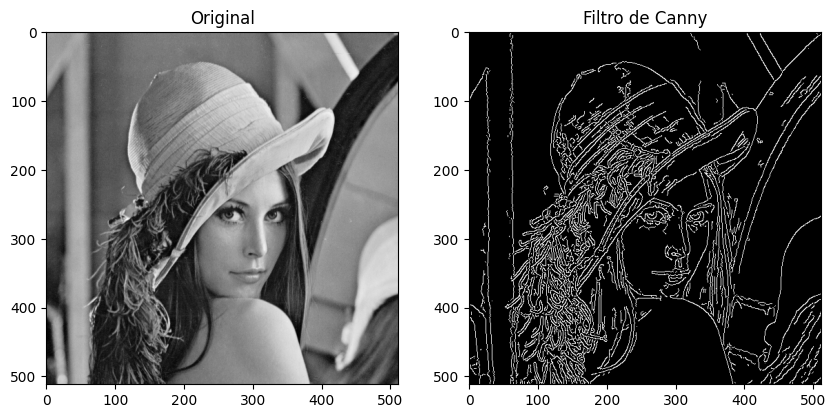

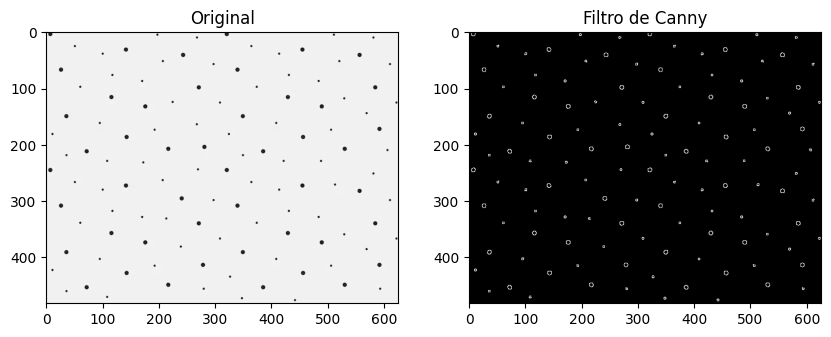

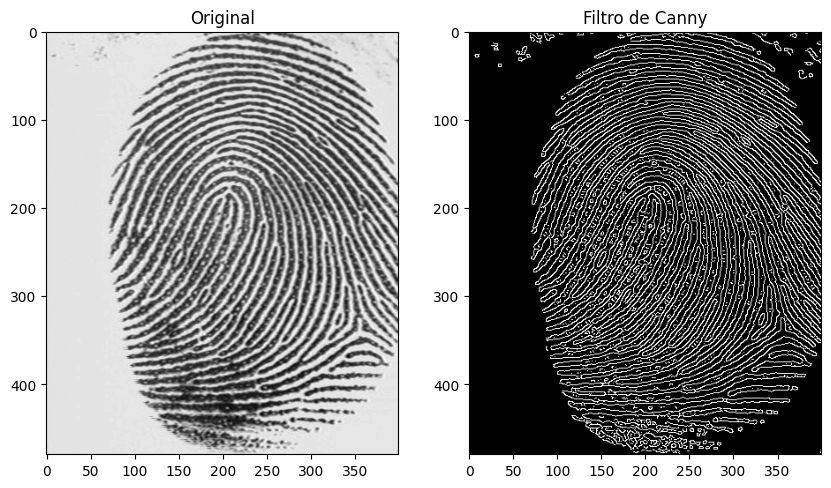

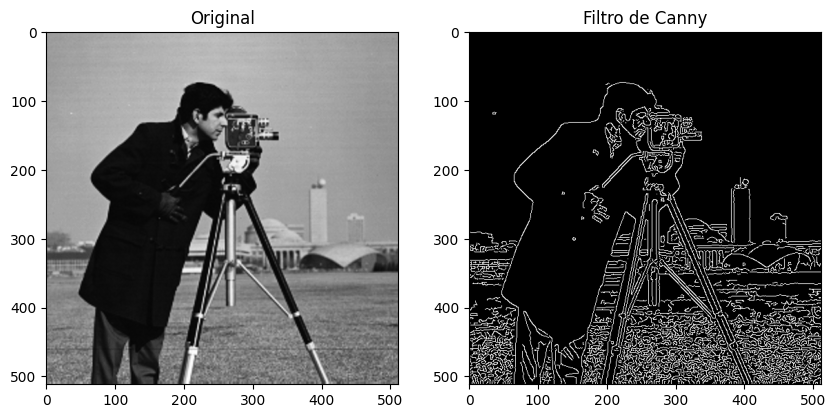

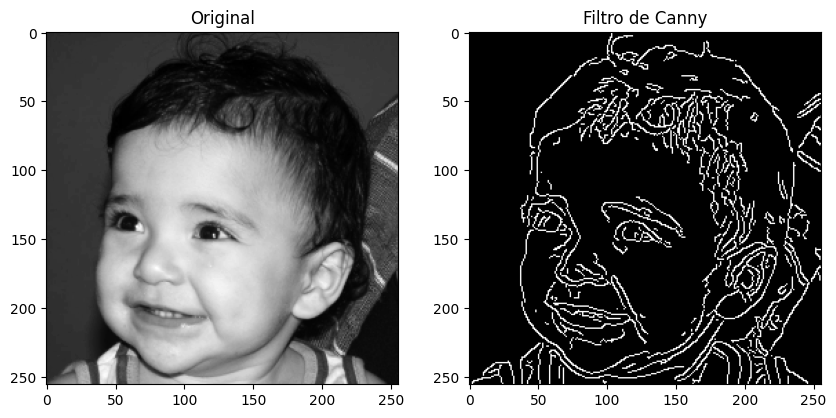

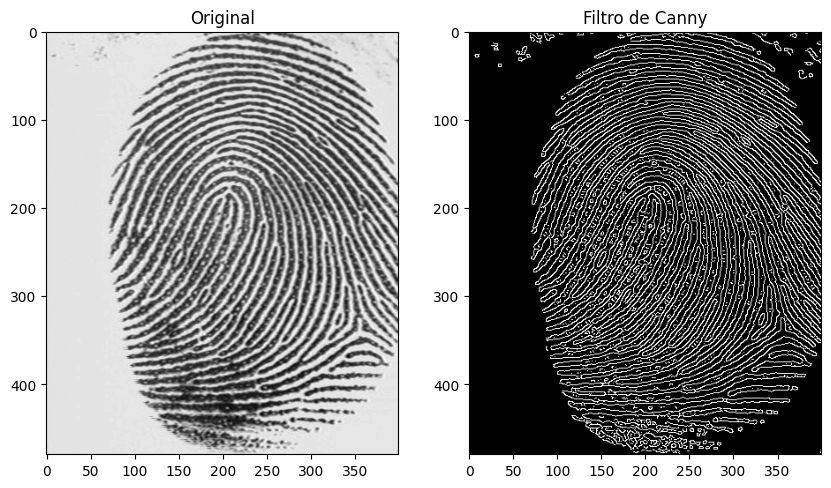

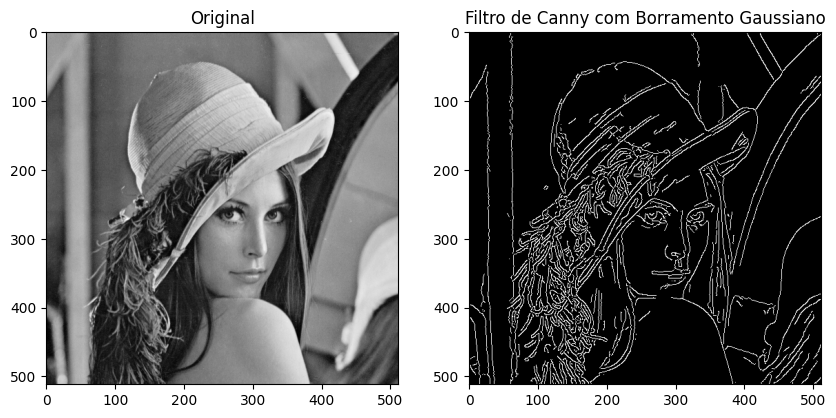

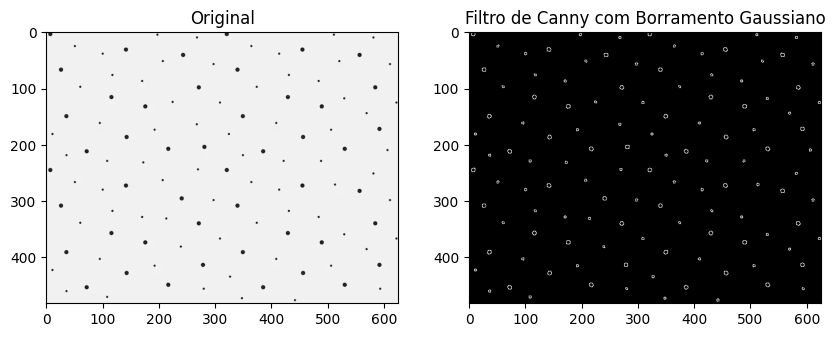

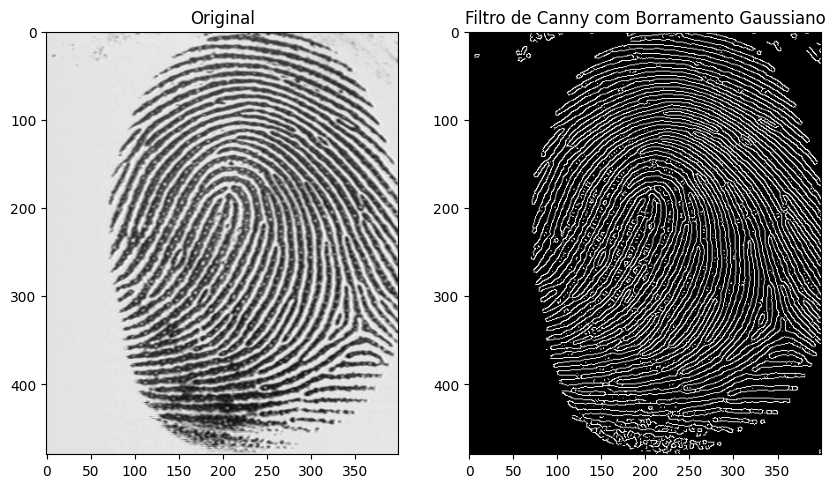

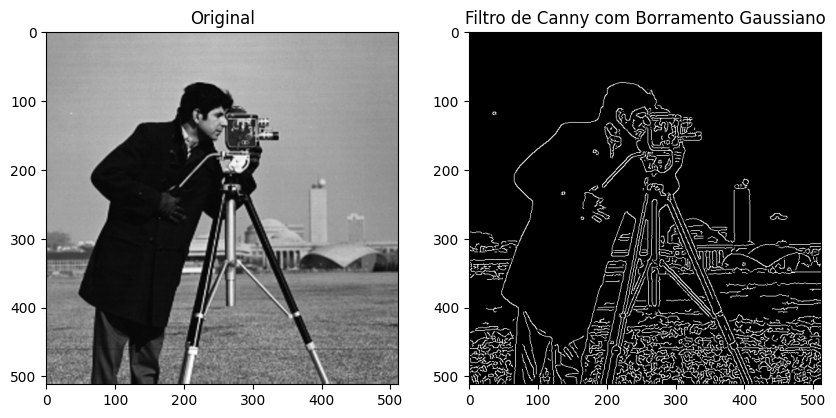

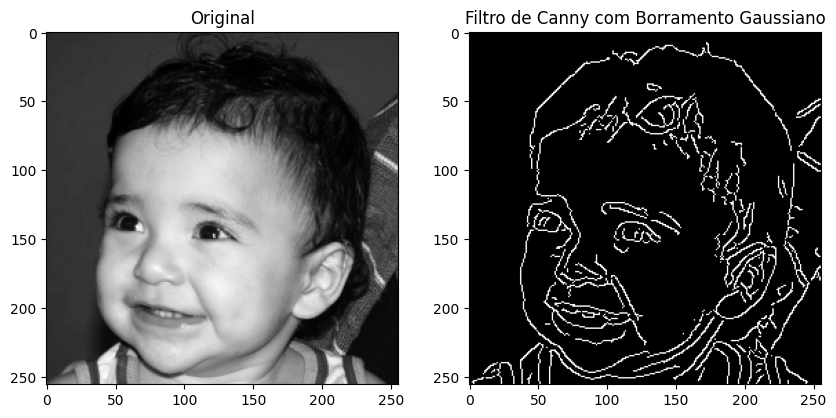

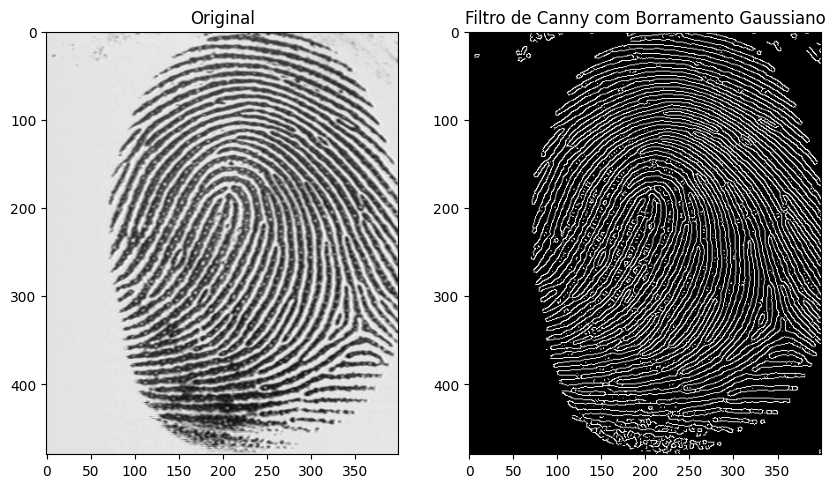

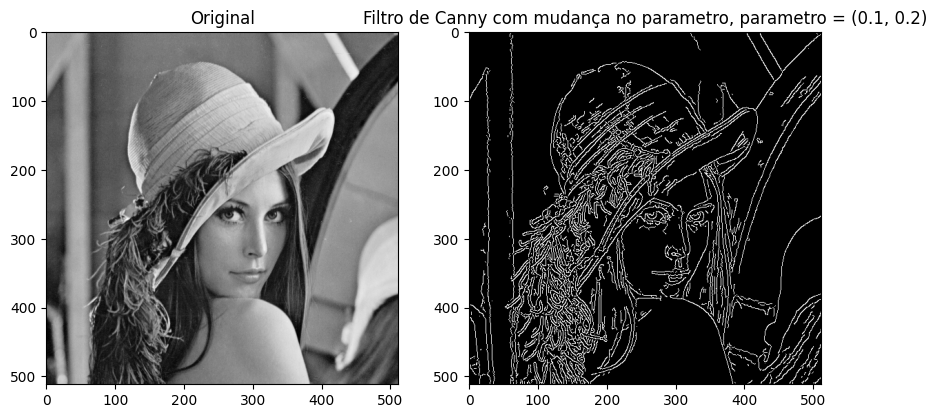

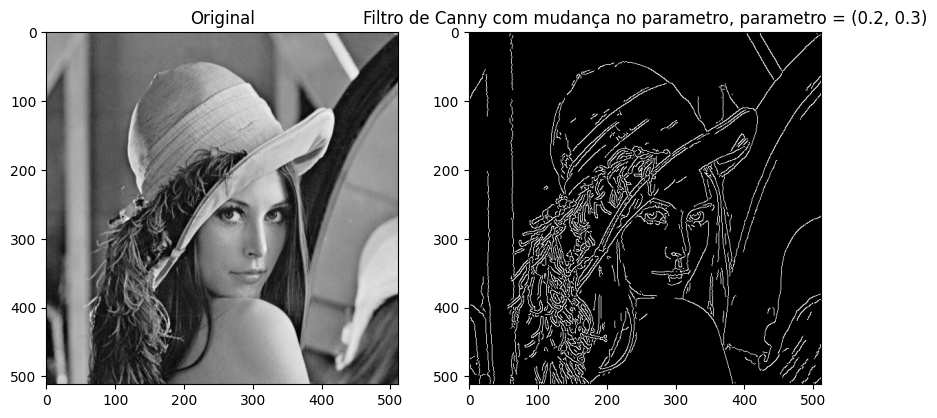

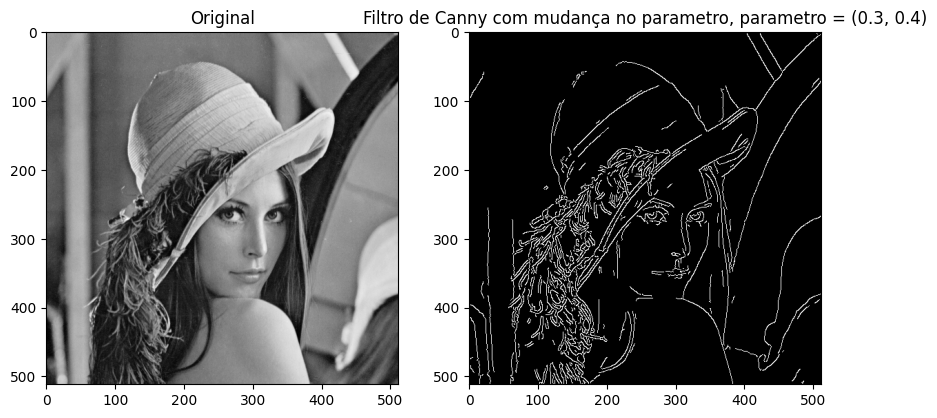

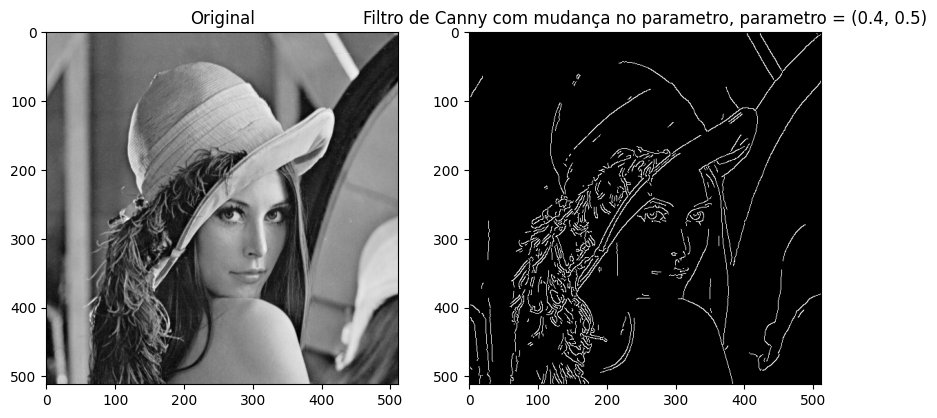

In [57]:
params = [(0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6)]
images_names = os.listdir('images')
images = [cv2.imread('images/' + name, 0) for name in images_names]
image_original = [cv2.imread('images/' + name, 0) for name in images_names]
images = [canny(img, t1=t1, t2=t2) for img in images for t1, t2 in params]

for i in range(len(image_original)):
  plota(image_original[i], canny(image_original[i]), "Filtro de Canny")
for i in range(len(image_original)):
  plota(image_original[i], canny(gaussian_blur(image_original[i])), "Filtro de Canny com Borramento Gaussiano")
for i in range(4):
  plota(image_original[0], images[i], "Filtro de Canny com mudança no parametro, parametro = {}".format(params[i]))